In [6]:
#melt (wide to long format)
import pandas as pd
df = pd.DataFrame({
    "country": ["USA", "USA", "India", "India"],
    "year": [2020, 2021, 2020, 2021],
    "sales":[100,120,90,110],
    "profit":[20,25, 18, 22],
    
})
df

,country,year,sales,profit
0,USA,2020,100,20
1,USA,2021,120,25
2,India,2020,90,18
3,India,2021,110,22


In [8]:
melted_df = df.melt(
    id_vars=["country", "year"], 
    value_vars=["sales", "profit"],
    var_name="metrics",
    value_name="value"
)
melted_df

,country,year,metrics,value
0,USA,2020,sales,100
1,USA,2021,sales,120
2,India,2020,sales,90
3,India,2021,sales,110
4,USA,2020,profit,20
5,USA,2021,profit,25
6,India,2020,profit,18
7,India,2021,profit,22


In [9]:
#pivot (long to wide format)
original = melted_df.pivot(
    index=["country","year"],
    columns="metrics",
    values= "value"
)


In [11]:
original

metrics       profit  sales
country year               
India   2020      18     90
        2021      22    110
USA     2020      20    100
        2021      25    120

<Axes: xlabel='Age', ylabel='Salary'>

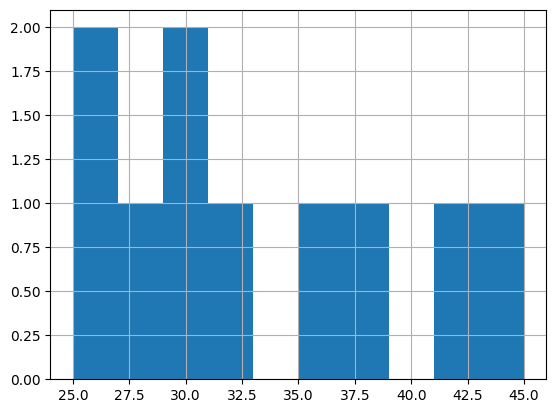

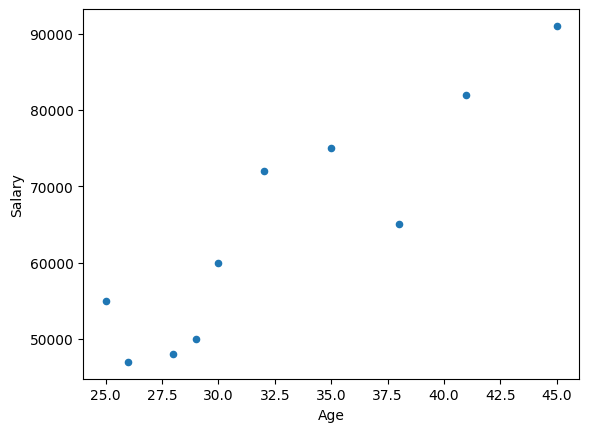

In [13]:
df = pd.read_csv("Downloads/employee_data.csv")
df["Age"].hist()

df.plot(kind="scatter", x="Age", y="Salary")


In [2]:
import pandas as pd
df_customers = pd.DataFrame({
    "customer_id":[1,2,3,4],
    "name":["adam", "bob", "charlie", "dave"]
})
df_orders = pd.DataFrame({
    "order_id": [101, 102, 300, 104],
    "customer_id":[2,1,4,5],
    "amount":[250, 120, 300, 180]
})




In [4]:
df_customers

,customer_id,name
0,1,adam
1,2,bob
2,3,charlie
3,4,dave


In [5]:
df_orders

,order_id,customer_id,amount
0,101,2,250
1,102,1,120
2,300,4,300
3,104,5,180


In [7]:
pd.merge(df_customers, df_orders, on="customer_id")    #inner join

,customer_id,name,order_id,amount
0,1,adam,102,120
1,2,bob,101,250
2,4,dave,300,300


In [8]:
pd.merge(df_customers, df_orders, on="customer_id", how="left")  #left join

,customer_id,name,order_id,amount
0,1,adam,102.0,120.0
1,2,bob,101.0,250.0
2,3,charlie,NaN,NaN
3,4,dave,300.0,300.0


In [9]:
pd.merge(df_customers, df_orders, on="customer_id", how="right")  #right join

,customer_id,name,order_id,amount
0,2,bob,101,250
1,1,adam,102,120
2,4,dave,300,300
3,5,NaN,104,180


In [10]:
pd.merge(df_customers, df_orders, on="customer_id", how = "outer")  #outer join

,customer_id,name,order_id,amount
0,1,adam,102.0,120.0
1,2,bob,101.0,250.0
2,3,charlie,NaN,NaN
3,4,dave,300.0,300.0
4,5,NaN,104.0,180.0


In [11]:
#data concatenation
df1 = pd.DataFrame({
    "id": [1,2,3],
    "name":["adam","eve","bob"]
})
df2 = pd.DataFrame({
    "id": [4,5,6],
    "name":["charlie", "fester","gilian"]
})

pd.concat([df1,df2])  #row


,id,name
0,1,adam
1,2,eve
2,3,bob
0,4,charlie
1,5,fester
2,6,gilian


In [12]:
pd.concat([df1, df2], ignore_index=True)

,id,name
0,1,adam
1,2,eve
2,3,bob
3,4,charlie
4,5,fester
5,6,gilian


In [13]:
pd.concat([df1,df2], axis=1)   #col

,id,name,id,name
0,1,adam,4,charlie
1,2,eve,5,fester
2,3,bob,6,gilian
